<a href="https://colab.research.google.com/github/andrybrew/bi-8-maret/blob/main/Text_Mining_Digital_Currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Text Mining**

### **Install and Load Packages**

In [ ]:
# Install packages
! pip install tweet-preprocessor
! pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=d2c057ececd1ace491eb55c015be43a0739416b48ac9c6a7eb81fcc4c0e5ca00
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [ ]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import preprocessor as p
import numpy as np
import networkx as nx
import wordcloud
import nltk
import warnings
import itertools
import re
import os
import random
import pyLDAvis
import pyLDAvis.sklearn 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
# Import module
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from tqdm import tqdm
from nltk import bigrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Set parameter
warnings.filterwarnings('ignore')
pyLDAvis.enable_notebook()

### **Import Data**

In [ ]:
# Import data
df = pd.read_csv("https://raw.githubusercontent.com/andrybrew/bi-8-maret/main/data/tweet-full.csv")

In [ ]:
# Lihat 5 baris pertama data
df.head(5)

,created_at,screen_name,text
0,2020-12-30,PapaPapag1954,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...
1,2020-12-30,HsarafattoHogan,"@davidmcw Come on David, tell me billionaires ..."
2,2020-12-30,hunter_1st,@PeterSchiff Chinas digital currency could bri...
3,2020-03-26,hunter_1st,@Bipoker @woofBIGDAWG @PeterSchiff Bitcoin is ...
4,2020-12-30,Deanmufc77,@ecb @finanzfluss And people still call the NW...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26768 entries, 0 to 26767
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   26768 non-null  object
 1   screen_name  26768 non-null  object
 2   text         26768 non-null  object
dtypes: object(3)
memory usage: 627.5+ KB


### **Text Preprocessing**

In [ ]:
# Pilih 5 kolom teks saja
tweet = df[['text']]

# Lihat 5 baris pertama data
tweet.head()

,text
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...
1,"@davidmcw Come on David, tell me billionaires ..."
2,@PeterSchiff Chinas digital currency could bri...
3,@Bipoker @woofBIGDAWG @PeterSchiff Bitcoin is ...
4,@ecb @finanzfluss And people still call the NW...


### **Transformation**

In [ ]:
# Membuat fungsi transformasi tweet
def transform_tweet(row):
  tweet = row['text']
  tweet = p.clean(tweet)
  tweet = str.lower(tweet)
  return tweet

In [ ]:
# Mengaplikasikan fungsi transofrmasi
tweet['transformed'] = tweet.apply(transform_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head(5)

,text,transformed
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...,much easier to implement the changes and laws ...
1,"@davidmcw Come on David, tell me billionaires ...","come on david, tell me billionaires arent sitt..."
2,@PeterSchiff Chinas digital currency could bri...,chinas digital currency could briefly become t...
3,@Bipoker @woofBIGDAWG @PeterSchiff Bitcoin is ...,"bitcoin is already worthless, it wont suddenly..."
4,@ecb @finanzfluss And people still call the NW...,and people still call the nwo and one digital ...


### **Tokenization**

In [ ]:
# Download Punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Membuat fungsi tokenization
def tokenize_tweet(row):
    tweet = row['transformed']
    tokens = nltk.word_tokenize(tweet)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [ ]:
# Mengaplikasikan fungsi tokenization
tweet['tokenized'] = tweet.apply(tokenize_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head(5)

,text,transformed,tokenized
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...,much easier to implement the changes and laws ...,"[much, easier, to, implement, the, changes, an..."
1,"@davidmcw Come on David, tell me billionaires ...","come on david, tell me billionaires arent sitt...","[come, on, david, tell, me, billionaires, aren..."
2,@PeterSchiff Chinas digital currency could bri...,chinas digital currency could briefly become t...,"[chinas, digital, currency, could, briefly, be..."
3,@Bipoker @woofBIGDAWG @PeterSchiff Bitcoin is ...,"bitcoin is already worthless, it wont suddenly...","[bitcoin, is, already, worthless, it, wont, su..."
4,@ecb @finanzfluss And people still call the NW...,and people still call the nwo and one digital ...,"[and, people, still, call, the, nwo, and, one,..."


### **Lemmatization**

In [ ]:
# Download Wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Membuat fungsi lemmatization
def lemmatize_tweet(row):
    list = row['tokenized']
    lemmatize_list = [WordNetLemmatizer().lemmatize(w, pos='v') for w in list]
    return(lemmatize_list)

In [ ]:
# Mengaplikasikan fungsi lemmatization
tweet['lemmatized'] = tweet.apply(lemmatize_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head(5)

,text,transformed,tokenized,lemmatized
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...,much easier to implement the changes and laws ...,"[much, easier, to, implement, the, changes, an...","[much, easier, to, implement, the, change, and..."
1,"@davidmcw Come on David, tell me billionaires ...","come on david, tell me billionaires arent sitt...","[come, on, david, tell, me, billionaires, aren...","[come, on, david, tell, me, billionaires, aren..."
2,@PeterSchiff Chinas digital currency could bri...,chinas digital currency could briefly become t...,"[chinas, digital, currency, could, briefly, be...","[chinas, digital, currency, could, briefly, be..."
3,@Bipoker @woofBIGDAWG @PeterSchiff Bitcoin is ...,"bitcoin is already worthless, it wont suddenly...","[bitcoin, is, already, worthless, it, wont, su...","[bitcoin, be, already, worthless, it, wont, su..."
4,@ecb @finanzfluss And people still call the NW...,and people still call the nwo and one digital ...,"[and, people, still, call, the, nwo, and, one,...","[and, people, still, call, the, nwo, and, one,..."


### **Stopword Removal**

In [ ]:
# Download stopword bahasa inggris
nltk.download('stopwords')
stops = set(stopwords.words("english"))     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Membuat fungsi lemmatization
def stopword_tweet(row):
    list = row['lemmatized']
    stopword_list = [w for w in list if not w in stops]
    return(stopword_list)

In [ ]:
# Mengaplikasikan fungsi Stopword
tweet['stopword'] = tweet.apply(stopword_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head(5)

,text,transformed,tokenized,lemmatized,stopword
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...,much easier to implement the changes and laws ...,"[much, easier, to, implement, the, changes, an...","[much, easier, to, implement, the, change, and...","[much, easier, implement, change, laws, theyve..."
1,"@davidmcw Come on David, tell me billionaires ...","come on david, tell me billionaires arent sitt...","[come, on, david, tell, me, billionaires, aren...","[come, on, david, tell, me, billionaires, aren...","[come, david, tell, billionaires, arent, sit, ..."
2,@PeterSchiff Chinas digital currency could bri...,chinas digital currency could briefly become t...,"[chinas, digital, currency, could, briefly, be...","[chinas, digital, currency, could, briefly, be...","[chinas, digital, currency, could, briefly, be..."
3,@Bipoker @woofBIGDAWG @PeterSchiff Bitcoin is ...,"bitcoin is already worthless, it wont suddenly...","[bitcoin, is, already, worthless, it, wont, su...","[bitcoin, be, already, worthless, it, wont, su...","[bitcoin, already, worthless, wont, suddenly, ..."
4,@ecb @finanzfluss And people still call the NW...,and people still call the nwo and one digital ...,"[and, people, still, call, the, nwo, and, one,...","[and, people, still, call, the, nwo, and, one,...","[people, still, call, nwo, one, digital, curre..."


### **Rejoin**

In [ ]:
# Membuat fungsi rejoin
def rejoin_tweet(row):
    list = row['stopword']
    joined_words = ( " ".join(list))
    return joined_words

In [ ]:
# Mengaplikasikan fungsi rejoin
tweet['final'] = tweet.apply(rejoin_tweet, axis=1)

# Lihat 5 baris pertama data
tweet.head(5)

,text,transformed,tokenized,lemmatized,stopword,final
0,@LewisECFC @Kes1977 @herotroyippygod @GlobeSen...,much easier to implement the changes and laws ...,"[much, easier, to, implement, the, changes, an...","[much, easier, to, implement, the, change, and...","[much, easier, implement, change, laws, theyve...",much easier implement change laws theyve want ...
1,"@davidmcw Come on David, tell me billionaires ...","come on david, tell me billionaires arent sitt...","[come, on, david, tell, me, billionaires, aren...","[come, on, david, tell, me, billionaires, aren...","[come, david, tell, billionaires, arent, sit, ...",come david tell billionaires arent sit hot tub...
2,@PeterSchiff Chinas digital currency could bri...,chinas digital currency could briefly become t...,"[chinas, digital, currency, could, briefly, be...","[chinas, digital, currency, could, briefly, be...","[chinas, digital, currency, could, briefly, be...",chinas digital currency could briefly become w...
3,@Bipoker @woofBIGDAWG @PeterSchiff Bitcoin is ...,"bitcoin is already worthless, it wont suddenly...","[bitcoin, is, already, worthless, it, wont, su...","[bitcoin, be, already, worthless, it, wont, su...","[bitcoin, already, worthless, wont, suddenly, ...",bitcoin already worthless wont suddenly become...
4,@ecb @finanzfluss And people still call the NW...,and people still call the nwo and one digital ...,"[and, people, still, call, the, nwo, and, one,...","[and, people, still, call, the, nwo, and, one,...","[people, still, call, nwo, one, digital, curre...",people still call nwo one digital currency con...


In [ ]:
# Final tweet yang sudah di proses
tweet_clean = tweet[['final']]
tweet_clean = tweet_clean.rename(columns={'final': 'text'})

# Lihat 5 baris pertama data
tweet_clean.head(5)

,text
0,much easier implement change laws theyve want ...
1,come david tell billionaires arent sit hot tub...
2,chinas digital currency could briefly become w...
3,bitcoin already worthless wont suddenly become...
4,people still call nwo one digital currency con...


### **Wordcloud**

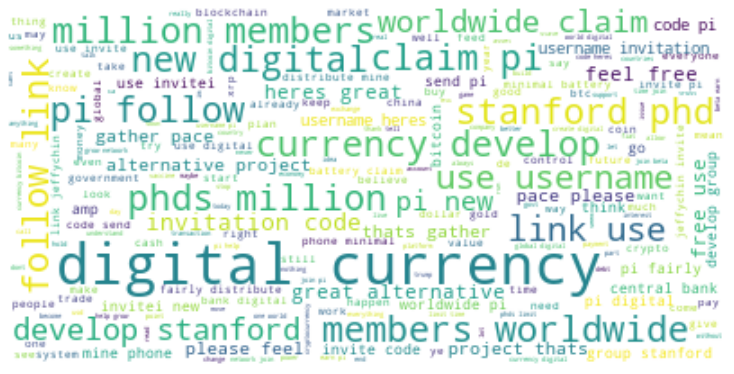

In [ ]:
# Visualisasi Word Cloud
text_wordcloud = " ".join(tweet for tweet in tweet_clean.text)

cloud = WordCloud(background_color='white').generate(text_wordcloud)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### **Sentiment Analysis**

In [ ]:
# Download corpus untuk sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in tweet_clean.iterrows():
  ss = sid.polarity_scores(row['text'])
  listy.append(ss)
  
se = pd.Series(listy)
tweet_clean['polarity'] = se.values
display(tweet_clean.head(5))

,text,polarity
0,much easier implement change laws theyve want ...,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp..."
1,come david tell billionaires arent sit hot tub...,"{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'comp..."
2,chinas digital currency could briefly become w...,"{'neg': 0.199, 'neu': 0.623, 'pos': 0.178, 'co..."
3,bitcoin already worthless wont suddenly become...,"{'neg': 0.433, 'neu': 0.567, 'pos': 0.0, 'comp..."
4,people still call nwo one digital currency con...,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp..."


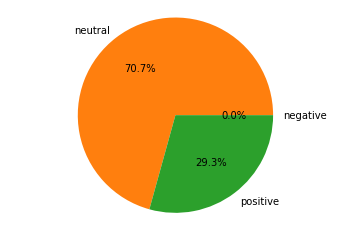

In [ ]:
# Visualisasi Pie Chart
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

### **Topic Modelling**

In [ ]:
# clone tambahan library dari github
! git clone https://github.com/machine-learning-ss/tm

# Set Data Directory
os.chdir('tm')

Cloning into 'tm'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [ ]:
import MyLib as TS

Tweets = tweet_clean['text']
print('Total loaded tweets = {0}'.format(len(Tweets)))

Total loaded tweets = 26768


In [ ]:
n_topics = 4
top_topics = 4
top_words = 10

In [ ]:
# Feature Extraction
count_vector = CountVectorizer(token_pattern = r'\b[a-zA-Z]{3,}\b') 
dtm_tf = count_vector.fit_transform(Tweets)
tf_terms = count_vector.get_feature_names()

100%|██████████| 26768/26768 [00:00<00:00, 740675.87it/s]


In total there are 4 major topics, distributed as follows


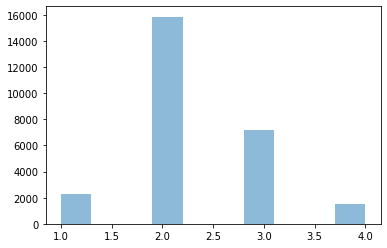

Printing top 4 Topics, with top 10 Words:
Topic #0:
digital currency first earn blockchain help grow app company base
Topic #1:
digital currency bank world bitcoin use central like money get
Topic #2:
use currency link digital follow develop stanford phds million worldwide
Topic #3:
que order amp great community lol twitter mark research name


In [ ]:
# Fungsi untuk mencari topic
lda_tf = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=0).fit(dtm_tf)

# Menampilkan Topik
vsm_topics = lda_tf.transform(dtm_tf); doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
plt.hist(np.array(doc_topic), alpha=0.5); plt.show()
print('Printing top {0} Topics, with top {1} Words:'.format(top_topics, top_words))
TS.print_Topics(lda_tf, tf_terms, top_topics, top_words)

In [ ]:
# Visualisasi Topic Secara Interaktif
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, count_vector) 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.061339  0.275962       1        1  49.740485
2     -0.327761 -0.164568       2        1  34.506813
0      0.134029  0.071035       3        1   9.608980
3      0.255071 -0.182429       4        1   6.143722, topic_info=           Term         Freq        Total Category  logprob  loglift
11931      link  6985.000000  6985.000000  Default  30.0000  30.0000
7963     follow  6973.000000  6973.000000  Default  29.0000  29.0000
5619    develop  6947.000000  6947.000000  Default  28.0000  28.0000
19104  stanford  6730.000000  6730.000000  Default  27.0000  27.0000
15292      phds  6716.000000  6716.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
12506      mark   145.704979   153.489449   Topic4  -5.1960   2.7377
14872      part   124.766448   277.156699   Topic4  -5.3512   1.9916
805         amp   227.981618  1509.837795   Topic4  -4.7483   0.8992
8865      great   227.929453  2340.920770   Topic4  -4.7486   0.4605
6446   economic    62.576855   255.815696   Topic4  -6.0412   1.3817

[189 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
82         4  0.991898   absolutely
450        3  0.992904        ahead
689        1  0.998596         also
697        2  0.999467  alternative
805        1  0.848436          amp
...      ...       ...          ...
22239      3  0.000538        world
22239      4  0.000538        world
22251      2  0.999951    worldwide
22276      1  0.999426        would
22531      4  0.991648      youtube

[195 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

### **Text Network Analysis**

In [ ]:
# Pilih teks
text = tweet_clean['text']
text

0        much easier implement change laws theyve want ...
1        come david tell billionaires arent sit hot tub...
2        chinas digital currency could briefly become w...
3        bitcoin already worthless wont suddenly become...
4        people still call nwo one digital currency con...
                               ...                        
26763    even today hardly shop kerala accept digital c...
26764    happy new year amp wish best lifetime keep wor...
26765    plan launch follow completion proprietary syst...
26766    digital currency currency greater surveillance...
26767    book great book read nowadays one find small e...
Name: text, Length: 26768, dtype: object

In [ ]:
# Tokenize
text_data = [word_tokenize(i) for i in text]
print(text_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Membuat fungsi cooccurence
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}

    bi_grams = list(bigrams(corpus))
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    return co_occurrence_matrix, vocab_index

In [ ]:
# Membuat Adjacency Matrix
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)

# Show Adjacency Matrix
data_matrix.head()

,boongan,regulre,temporary,minimis,attractive,procedurescentralized,towel,regardless,hace,deniers,mawndir,ambull,viewers,koire,numberit,decred,sharding,congolese,prayer,techies,wizyt,jenekrun,boes,mass,diosss,giftcards,roubinis,chinamaybe,mauritius,vhf,renounce,bgates,cubanos,lightskin,stretch,parliamentary,capitalization,heel,payers,expend,...,robar,rogue,bradley,prosecco,handicap,conflate,sm,peacekeepers,overreaction,luckize,overlooming,epicentre,npart,pkoi,trigger,kong,riki,andhra,abomination,disaster,asteroids,sistema,presence,generation,bsalayman,atleast,flash,lebih,uncensorable,telat,bel,queremos,greenbacks,ml,sd,irs,patronize,martians,cjec,sarah
boongan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
regulre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
temporary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
minimis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
attractive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Membuat Network dengan Adjacency Matrix
G = nx.from_pandas_adjacency(data_matrix)

In [ ]:
# Degree Centrality
degree = nx.degree_centrality(G)

list_node = list(degree) 
selected_node = list_node[1:600]

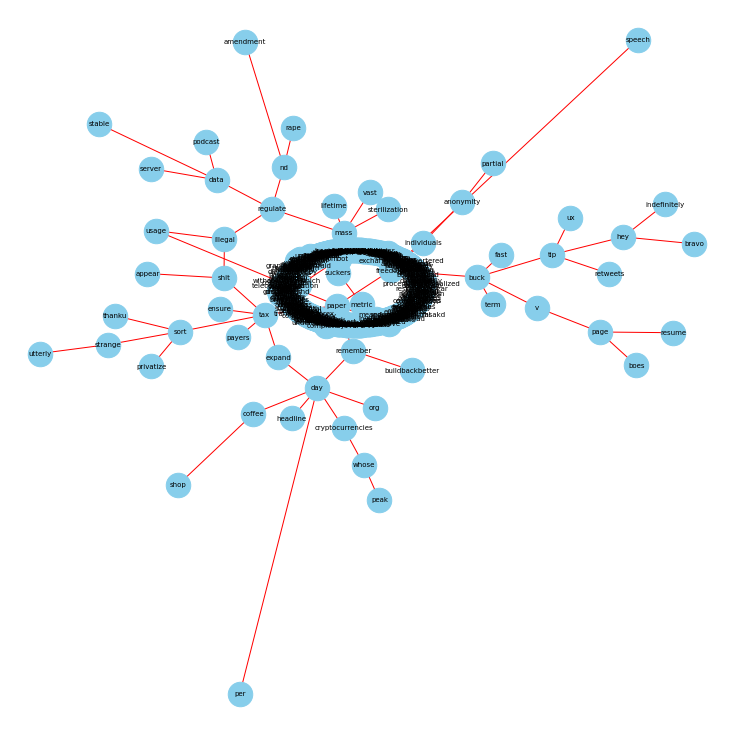

In [ ]:
sampled_graph = G.subgraph(selected_node)

plt.figure(figsize=(10, 10), facecolor=None)
nx.draw(sampled_graph, with_labels=True, 
        node_color='skyblue', node_size=600, 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=7,
        pos=nx.kamada_kawai_layout(sampled_graph))